### import necessary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Step 1: Read the data1.csv file using pandas

In [10]:
data = pd.read_csv('data1.csv') # Read the data

# Display the first few rows of the dataset
# print(data.head(7))
data.head(7) 

,X,Y,Class
0,5.5,7.0,1
1,9.4,13.0,1
2,6.0,6.8,1
3,12.5,13.0,0
4,5.5,5.6,1
5,13.5,16.0,0
6,11.5,15.0,0


### Step 2: Normalize or standardize the features

In [11]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['X', 'Y']]) # Scale the data
data_scaled[:7]

array([[0.27941939, 0.43431804],
       [0.48159668, 0.81143935],
       [0.30533955, 0.42174733],
       [0.64230171, 0.81143935],
       [0.27941939, 0.34632307],
       [0.69414204, 1.        ],
       [0.59046138, 0.93714645]])

### Step 3: Use FCM algorithm for clustering with c values from 2 to 10

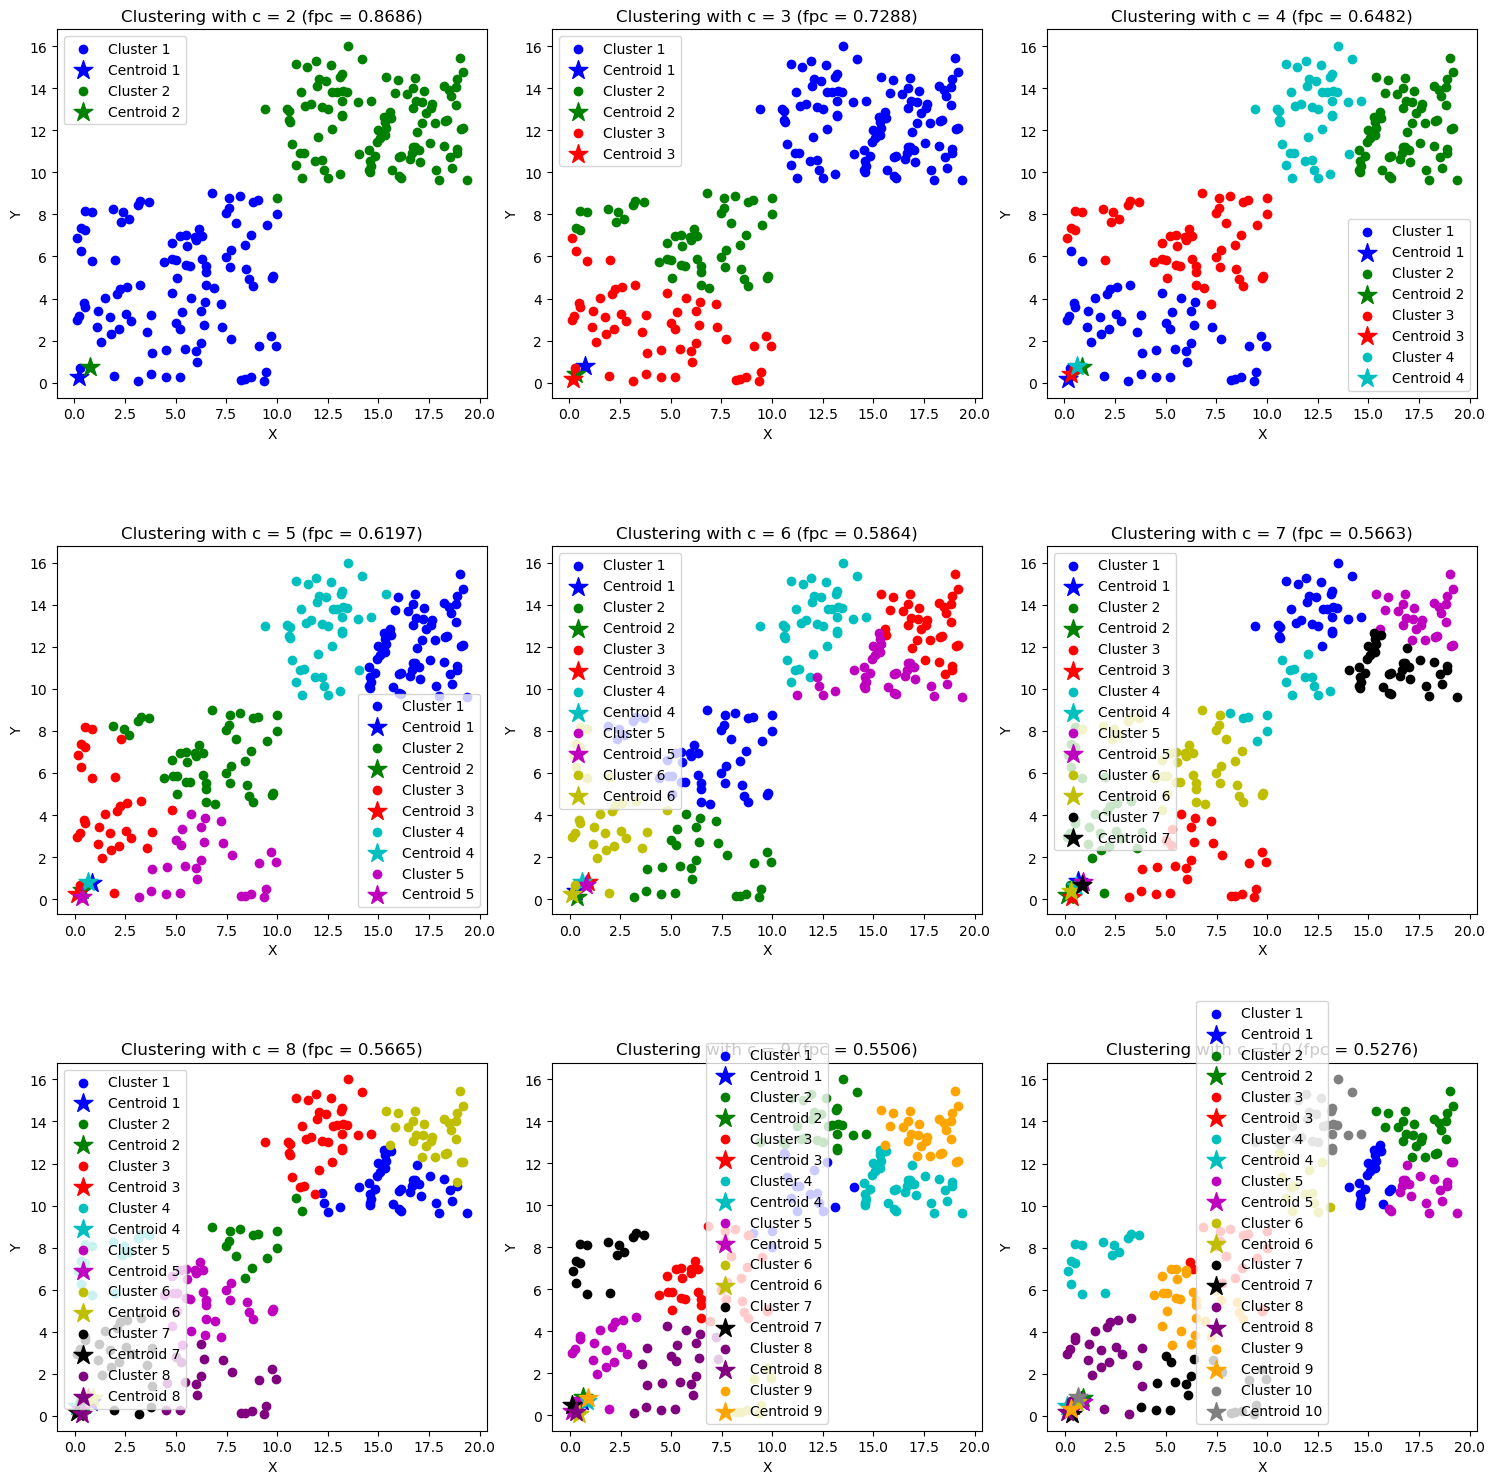

In [12]:
c_values = range(2, 11)
fig, axs = plt.subplots(3, 3, figsize=(15, 15)) # Create a 3x3 array of subplots
axs = axs.ravel() # Flatten the 3x3 array into a 1-d array

for i, c in enumerate(c_values):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans( 
        data_scaled.T, c, m=2, error=0.005, maxiter=1000, init=None
    ) # Cluster the data with the current c value

    # Step 3: Visualize the clusters for each c value
    cluster_membership = np.argmax(u, axis=0)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray']

    for j in range(c):
        axs[i].scatter(
            data['X'][cluster_membership == j],
            data['Y'][cluster_membership == j],
            color=colors[j],
            label=f'Cluster {j+1}',
        )
        axs[i].scatter(
            cntr[j][0], cntr[j][1], color=colors[j], marker='*', s=200, label=f'Centroid {j+1}'
        )
    axs[i].set_title(f'Clustering with c = {c} (fpc = {fpc:.4f})')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].legend()

plt.tight_layout()
plt.show()

### Step 4: Determine the best number of clusters using FPC criterion

In [13]:
# Fuzzy Partition Coefficient (FPC) is a metric which tells us how cleanly the data is divided into clusters (0 to 1)
# Higher the FPC, better the clustering
# FPC formula: FPC = (sum i=1 to c (n_i * max(u_i))) / n
fpc_values = [] 
for c in c_values:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data_scaled.T, c, m=2, error=0.005, maxiter=1000, init=None
    )
    fpc_values.append(fpc)

# Find the best number of clusters
best_c = np.argmax(fpc_values) + 2  # Adding 2 as c values range from 2 to 10 (not 0 to 8)
best_fpc = max(fpc_values)
print(f"Best number of clusters: {best_c} with FPC value: {best_fpc}")

Best number of clusters: 2 with FPC value: 0.868590363765449


### Assign data points to clusters for the best 'c' value

In [14]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_scaled.T, best_c, m=2, error=0.005, maxiter=1000, init=None
)
cluster_membership = np.argmax(u, axis=0)

# Display the clusters corresponding to each data point for the best 'c' value
data['Cluster'] = cluster_membership
print(f"\n10 sample data points with corresponding clusters for the best 'c' value that is {best_c}:")
# print(data.sample(10))
data.sample(10)


10 sample data points with corresponding clusters for the best 'c' value that is 2:


,X,Y,Class,Cluster
97,6.40,2.72,1,1
55,5.46,1.60,1,1
26,6.32,6.96,1,1
12,1.79,2.32,1,1
174,10.95,15.13,0,0
1,9.40,13.00,1,0
29,8.73,0.25,1,1
130,10.62,12.41,0,0
111,1.49,4.04,1,1
108,4.40,5.75,1,1


### Visualize the clusters for the best 'c' value

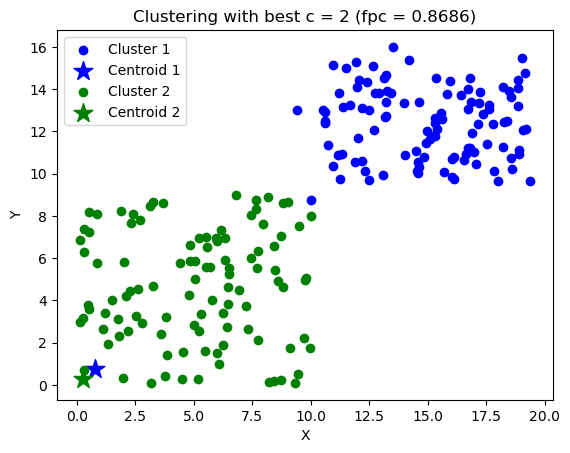

In [15]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray']
for j in range(best_c):
    plt.scatter(
        data['X'][cluster_membership == j],
        data['Y'][cluster_membership == j],
        color=colors[j],
        label=f'Cluster {j+1}',
    )
    plt.scatter(
        cntr[j][0], cntr[j][1], color=colors[j], marker='*', s=200, label=f'Centroid {j+1}'
    )
plt.title(f'Clustering with best c = {best_c} (fpc = {best_fpc:.4f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Doing same thing for data2.csv

First few rows of the dataset:
          X         Y  Class
0 -0.842046  0.408155      0
1  0.096394 -0.852114      1
2 -0.964828  0.034454      0
3 -0.164699  0.817332      1
4  0.274231  0.756343      1
5  0.618110  0.471935      1
6  1.014510  0.361997      0


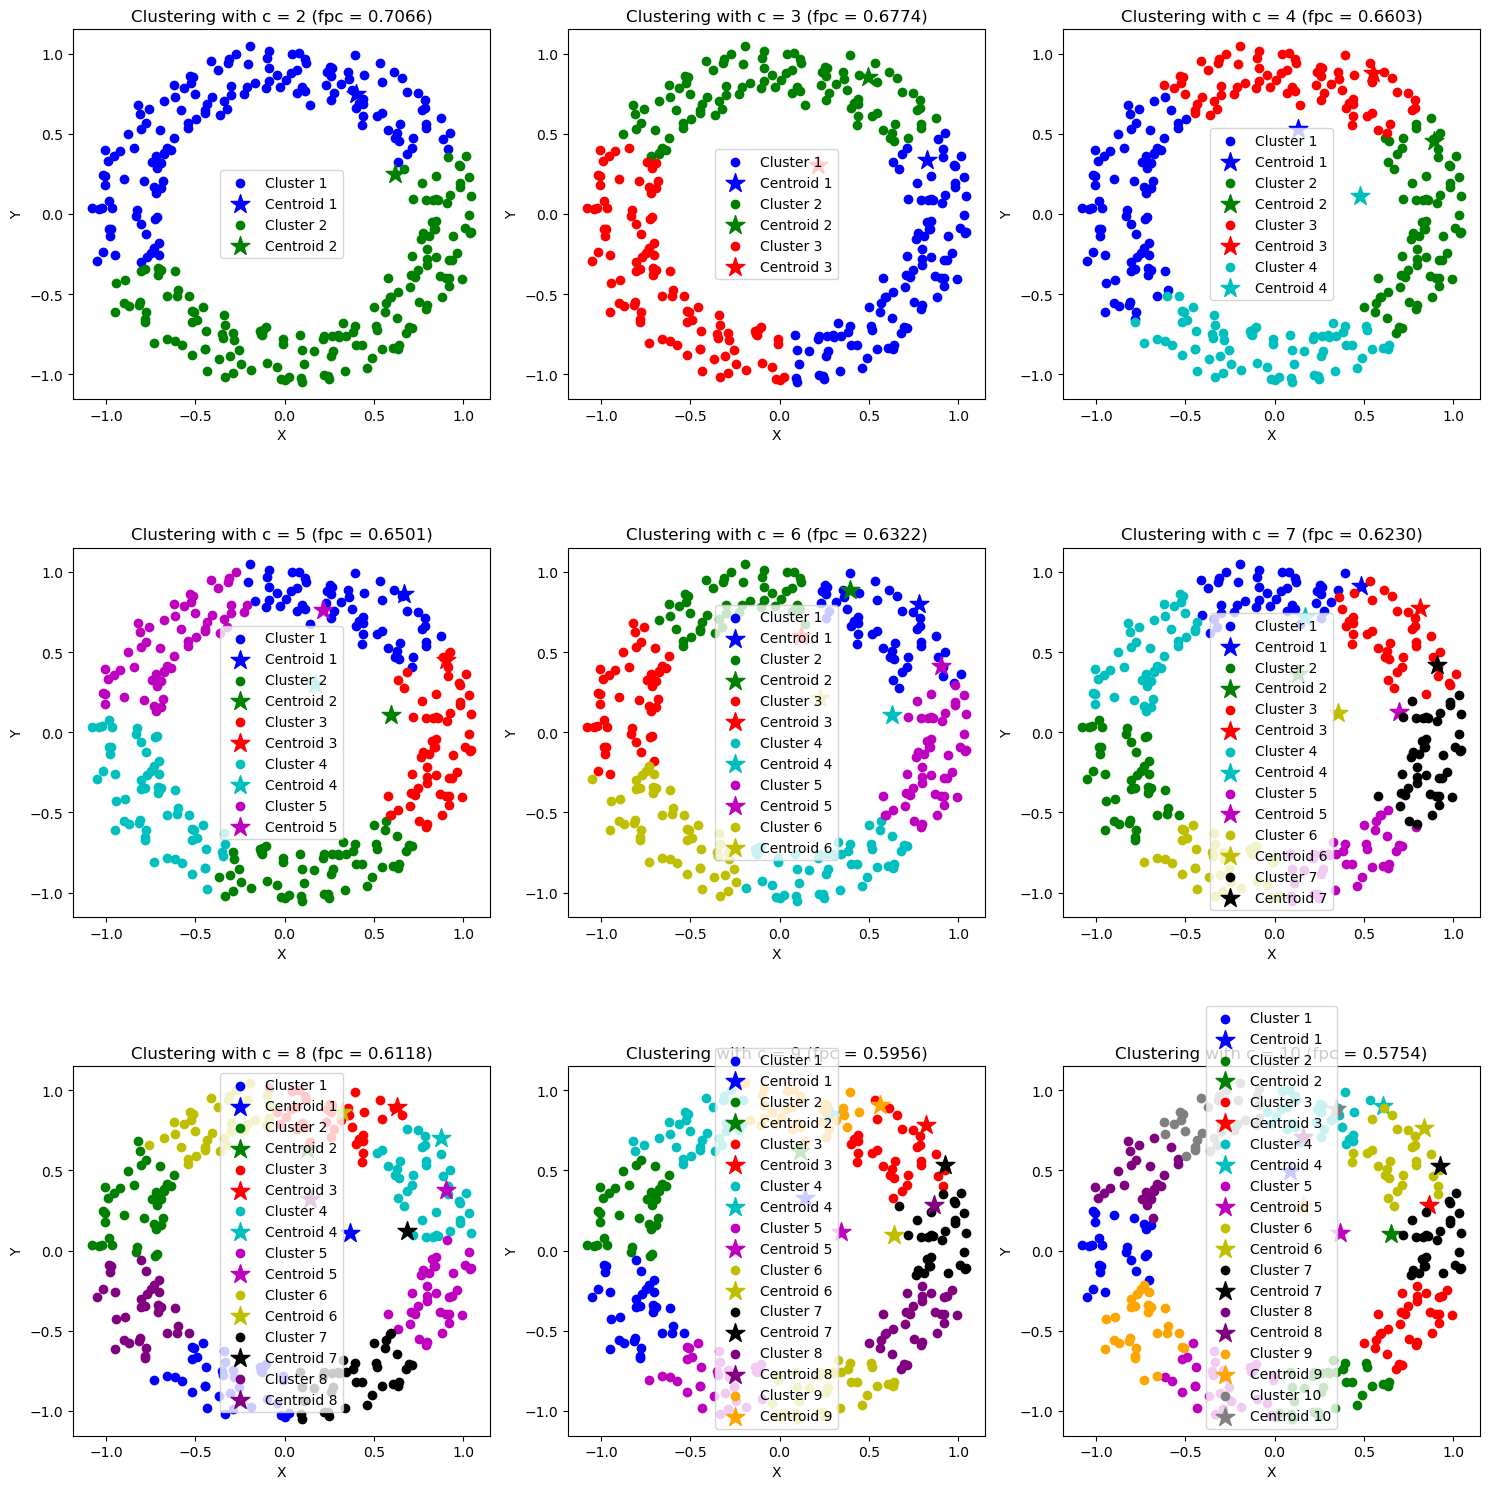


Best number of clusters: 2 with FPC value: 0.7065606006764892

10 sample data points with corresponding clusters for the best 'c' value that is 2:
            X         Y  Class  Cluster
226 -0.309160  0.964616      0        0
152 -1.007145  0.395759      0        0
278 -0.446713 -0.845315      0        1
221 -0.952547 -0.612353      0        1
127 -0.138402 -0.727438      1        1
291  0.799348 -0.569806      0        1
210 -0.226160  0.749354      1        0
232  0.981038  0.169891      0        1
117  0.716119 -0.262026      1        1
0   -0.842046  0.408155      0        0


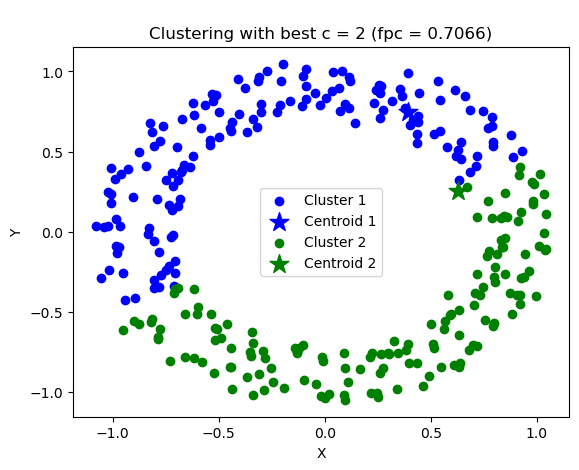

In [16]:
# Step 1: Read the data2.csv file using pandas
data = pd.read_csv('data2.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head(7))

# Step 2: Normalize or standardize the features
# scaler = StandardScaler()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['X', 'Y']])

# Step 3: Use FCM algorithm for clustering with c values from 2 to 10
c_values = range(2, 11)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()

for i, c in enumerate(c_values):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data_scaled.T, c, m=2, error=0.005, maxiter=1000, init=None
    )

    # Step 3: Visualize the clusters for each c value
    cluster_membership = np.argmax(u, axis=0)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray']

    for j in range(c):
        axs[i].scatter(
            data['X'][cluster_membership == j],
            data['Y'][cluster_membership == j],
            color=colors[j],
            label=f'Cluster {j+1}',
        )
        axs[i].scatter(
            cntr[j][0], cntr[j][1], color=colors[j], marker='*', s=200, label=f'Centroid {j+1}'
        )
    axs[i].set_title(f'Clustering with c = {c} (fpc = {fpc:.4f})')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Step 4: Determine the best number of clusters using FPC criterion
fpc_values = []
for c in c_values:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data_scaled.T, c, m=2, error=0.005, maxiter=1000, init=None
    )
    fpc_values.append(fpc)

# Find the best number of clusters
best_c = np.argmax(fpc_values) + 2  # Adding 2 as c values range from 2 to 10
best_fpc = max(fpc_values)
print(f"\nBest number of clusters: {best_c} with FPC value: {best_fpc}")

# Assign data points to clusters for the best 'c' value
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_scaled.T, best_c, m=2, error=0.005, maxiter=1000, init=None
)
cluster_membership = np.argmax(u, axis=0)

# Display the clusters corresponding to each data point for the best 'c' value
data['Cluster'] = cluster_membership
print(f"\n10 sample data points with corresponding clusters for the best 'c' value that is {best_c}:")
print(data.sample(10))
# data.sample(10)

# Visualize the clusters for the best 'c' value
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray']
for j in range(best_c):
    plt.scatter(
        data['X'][cluster_membership == j],
        data['Y'][cluster_membership == j],
        color=colors[j],
        label=f'Cluster {j+1}',
    )
    plt.scatter(
        cntr[j][0], cntr[j][1], color=colors[j], marker='*', s=200, label=f'Centroid {j+1}'
    )
plt.title(f'\nClustering with best c = {best_c} (fpc = {best_fpc:.4f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
